In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [34]:
train_df = pd.read_csv('./train.csv',parse_dates = ['Date'],low_memory=False )
test_df = pd.read_csv('./test.csv', parse_dates = ['Date'],low_memory=False)
store= pd.read_csv('./store.csv',low_memory=False)

In [35]:
train_df = train_df.merge(store, on='Store')
test_df = test_df.merge(store, on='Store')

In [36]:
print(train_df.Date.min(), train_df.Date.max())
print(test_df.Date.min(), test_df.Date.max())

2013-01-01 00:00:00 2015-07-31 00:00:00
2015-08-01 00:00:00 2015-09-17 00:00:00


In [37]:
val_df = train_df[train_df.Date>'2015-07-01']
train_df = train_df[train_df.Date<'2015-07-01']

In [38]:
def create_datetime_features(df):
    dt_col = df['Date'].dt
    df['year'] = dt_col.year
    df['month'] = dt_col.month
    df['day'] = dt_col.day
    df['dayofyear'] = dt_col.dayofyear
    df['weekofyear'] = dt_col.weekofyear
    
    return df

train_df = create_datetime_features(train_df)
val_df = create_datetime_features(val_df)
test_df = create_datetime_features(test_df)
    

/tmp/ipykernel_5654/4149140368.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = dt_col.weekofyear
/tmp/ipykernel_5654/4149140368.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = dt_col.weekofyear
/tmp/ipykernel_5654/4149140368.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = dt_col.weekofyear


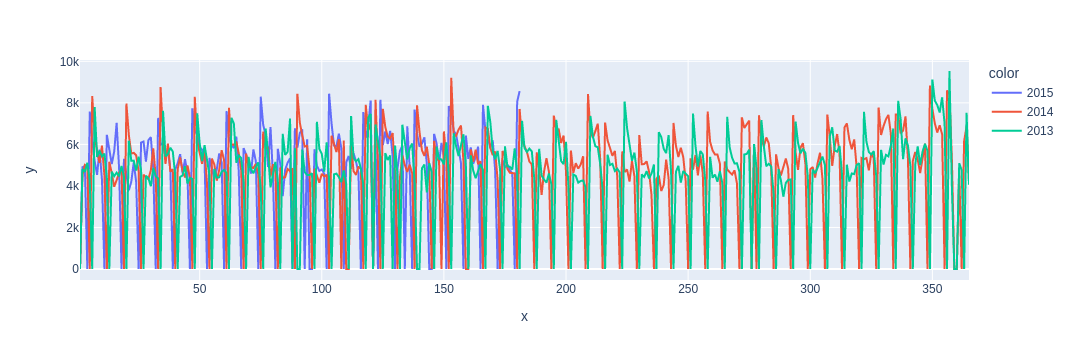

In [43]:
from plotly import express as ex

subset_to_plot = train_df[train_df['Store'] == 10]

ex.line(x=subset_to_plot['dayofyear'], y=subset_to_plot['Sales'], color=subset_to_plot['year'])

## Categorical features

In [47]:
features = [col for col in train_df.columns if col not in ['Sales', 'Customers', 'Date']]

cat_features = train_df[features].select_dtypes(include='object').columns

le = LabelEncoder()

for f in cat_features:
    train_df[f]=le.fit_transform(train_df[f].astype(str))
    test_df[f]=le.transform(test_df[f].astype(str))
    val_df[f]=le.transform(val_df[f].astype(str))
